In [22]:
from pytamp.benchmark import Rearrange1
from pytamp.utils.making_scene_utils import load_mesh, get_obj_name, Make_Scene
from pykin.utils.mesh_utils import get_object_mesh, get_object_mesh_acronym
from pykin.utils import plot_utils as p_utils

import easydict
from pytamp.action.rearrangement import RearrangementAction
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
import numpy as np

def custom_parser():
    # object는 parser.add_argument( ~ , nargs="+") , nargs="+" 때문에 list로 arg 셋팅함
    args = easydict.EasyDict({
        "objects" : [
                    # "/home/juju/contact_graspnet/acronym/grasps/Candle_b94fcdffbd1befa57f5e345e9a3e5d44_0.012740999337464653.h5", 
                    # "/home/juju/contact_graspnet/acronym/grasps/Canister_714320da4aafcb4a47be2353d2b2403b_0.00023318612778400807.h5", 
                    "/home/juju/contact_graspnet/acronym/grasps/Bowl_2efc35a3625fa50961a9876fa6384765_0.012449533111417973.h5",
                    "/home/juju/contact_graspnet/acronym/grasps/Xbox360_435f39e98d2260f0d6e21b8525c3f8bb_0.002061950217848804.h5"
                    ],

        "support" : "/home/juju/contact_graspnet/acronym/grasps/3Shelves_29b66fc9db2f1558e0e89fd83955713c_0.0025867867973150068.h5",
        "num_grasps" : 5,
        "mesh_root" : '/home/juju/contact_graspnet/acronym/',
        "support_scale" : 0.025,

        "budgets" : 100,
        "max_depth" :  16,
        "seed" : 2,
        "algo" : "bai_perturb",
        "debug_mode" : False,

    })
    return args

def make_scene_():

    
    obj_dict = {}

    args = custom_parser()

    args.objects.append('ben_cube.stl')
    args.objects.append('bottle.stl')
#     args.objects.append('bottle.stl')
#     args.objects.append('ben_cube.stl')



    obj_dict = {}
    object_meshes=[]
    object_names=[]

    for o in args.objects:
        if '.h5' in o:
            object_meshes.append(load_mesh(o, mesh_root_dir=args.mesh_root))
            object_names.append(get_obj_name(obj_dict, o))
        if '.stl' in o:
            if 'cube' in o:
#                 object_meshes.append(get_object_mesh(o, 0.075))
                object_meshes.append(get_object_mesh(o, 0.1))
                object_names.append(get_obj_name(obj_dict, o))
            else:
                object_meshes.append(get_object_mesh(o))
                object_names.append(get_obj_name(obj_dict, o))

    # for PYTAMP 
    support_mesh = get_object_mesh("ben_table.stl", scale=[1.0, 1.5, 1.0])
    init_scene = Make_Scene.random_arrangement(object_names, object_meshes, support_mesh)
    goal_scene = Make_Scene.random_arrangement(object_names, object_meshes, support_mesh, for_goal_scene=True)
    rearrangement_scene = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

    return rearrangement_scene

args = custom_parser()

rearrangement1 = make_scene_()

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 1)



*********************** Logical States ***********************
OrderedDict([('Bowl0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('Xbox3600',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=Bowl0, pos=[ 0.27203802 -0.01449429  0.81004294]),
                           Object(name=Xbox3600, pos=[0.47109993 0.6177992  0.81026365]),
                           Object(name=ben_cube0, pos=[ 0.95557676 -0.13472868  0.86029998]),
                           Object(name=bottle0, pos=[ 0.94473742 -0.49002118  0.83593754])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************

*******

In [23]:
c = 1
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )

mcts.only_optimize_1 = True

In [24]:
import time 
c_list = [np.sqrt(2)]

for idx, c in enumerate(c_list):

    mcts = MCTS_rearrangement(
            scene_mngr=rearrangement1.scene_mngr,
            init_scene=rearrangement1.init_scene,
            sampling_method=args.algo,
            budgets=args.budgets,
            max_depth=args.max_depth,
            c=c,
            debug_mode=args.debug_mode,
        )

    mcts.only_optimize_1 = True
    start_time = time.time()
    for i in range(args.budgets):
        print(
            f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {args.algo}, C: {c}, Seed: {args.seed}"
        )
        mcts.do_planning_rearrange(i)


[1/1] Benchmark: 0, Algo: bai_perturb, C: 1.4142135623730951, Seed: 2
=========== Search iteration : 1 ===========
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(0) -> A(2) -> S'(5) Reward : -1
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(5) -> A(8) -> S'(11) Reward : -1
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(11) -> A(14) -> S'(17) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(17) -> A(21) -> S'(24) Reward : 2.5
###### check_goal :  False
[Action] Rearr Xbox3600
Good Action
[Reward] S(24) -> A(26) -> S'(30) Reward : 2.0
###### check_goal :  False
[Action] Rearr Xbox3600
Bad Action
[Reward] S(30) -> A(32) -> S'(35) Reward : -5
###### check_goal :  False
[Action] Rearr bottle0
placed another place not goal
[Reward] S(35) -> A(40) -> S'(41) Reward : -1
###### check_goal :  False
[Action] Rearr bottle0
pla

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(274) -> A(277) -> S'(279) Reward : -1
###### check_goal :  False
Exceeded the maximum depth!!

[1/1] Benchmark: 0, Algo: bai_perturb, C: 1.4142135623730951, Seed: 2
=========== Search iteration : 4 ===========
###### check_goal :  False
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(4) -> S'(281) Reward : -1
###### check_goal :  False
[Action] Rearr Xbox3600
Good Action
[Reward] S(281) -> A(284) -> S'(288) Reward : 5.0
###### check_goal :  False
[Action] Rearr Bowl0
Good Action
[Reward] S(288) -> A(289) -> S'(294) Reward : 3.333
###### check_goal :  False
[Action] Rearr Bowl0
Bad Action
[Reward] S(294) -> A(295) -> S'(299) Reward : -5
###### check_goal :  False
[Action] Rearr Xbox3600
Bad Action
[Reward] S(299) -> A(302) -> S'(305) Reward : -5
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(305) -> A(309) -> S'(311) Reward : -1
###### check_goal :  Fal

[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(469) -> A(514) -> S'(517) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(517) -> A(521) -> S'(524) Reward : 2.0
###### check_goal :  False
[Action] Rearr ben_cube0
Bad Action
[Reward] S(524) -> A(527) -> S'(529) Reward : -5
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(529) -> A(532) -> S'(535) Reward : -1
###### check_goal :  False
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(535) -> A(537) -> S'(541) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(541) -> A(545) -> S'(548) Reward : 1.111
###### check_goal :  False
[Action] Rearr Xbox3600
Good Action
[Reward] S(548) -> A(550) -> S'(554) Reward : 1.0
###### check_goal :  False
[Action] Rearr bottle0
Good Action
[Reward] S(554) -> A(558) -> S'(560) Reward : 0.909
###### check_goal :  False
[Action] Rearr Bowl0
Good Action
[Reward] S(

not bad Action
[Reward] S(686) -> A(689) -> S'(692) Reward : 0.067
###### check_goal :  False
[Action] Rearr Bowl0
not bad Action
[Reward] S(692) -> A(693) -> S'(698) Reward : 0.062
###### check_goal :  False
Exceeded the maximum depth!!

[1/1] Benchmark: 0, Algo: bai_perturb, C: 1.4142135623730951, Seed: 2
=========== Search iteration : 13 ===========
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(0) -> A(2) -> S'(5) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(5) -> A(9) -> S'(463) Reward : -1
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(463) -> A(466) -> S'(469) Reward : -1
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(469) -> A(514) -> S'(517) Reward : -1
###### check_goal :  False
[Action] Rearr bottle0
Good Action
[Reward] S(517) -> A(522) -> S'(568) Reward : 2.0
###### check_goal :  F

placed another place not goal
[Reward] S(580) -> A(583) -> S'(725) Reward : -1
###### check_goal :  False
[Action] Rearr bottle0
not bad Action
[Reward] S(725) -> A(730) -> S'(732) Reward : 0.111
###### check_goal :  False
[Action] Rearr Bowl0
Good Action
[Reward] S(732) -> A(733) -> S'(738) Reward : 1.0
###### check_goal :  False
[Action] Rearr Bowl0
Bad Action
[Reward] S(738) -> A(739) -> S'(743) Reward : -3.636
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(743) -> A(747) -> S'(749) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(749) -> A(753) -> S'(755) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(755) -> A(759) -> S'(761) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(761) -> A(765) -> S'(767) Reward : -1
###### check_goal :  False
[Action] Rearr Bowl0
Good Actio

not bad Action
[Reward] S(579) -> A(882) -> S'(884) Reward : 0.125
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(884) -> A(886) -> S'(889) Reward : -1
###### check_goal :  False
[Action] Rearr bottle0
not bad Action
[Reward] S(889) -> A(894) -> S'(896) Reward : 0.1
###### check_goal :  False
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(896) -> A(897) -> S'(901) Reward : -1
###### check_goal :  False
[Action] Rearr bottle0
not bad Action
[Reward] S(901) -> A(906) -> S'(908) Reward : 0.083
###### check_goal :  False
[Action] Rearr Bowl0
Good Action
[Reward] S(908) -> A(909) -> S'(914) Reward : 0.769
###### check_goal :  False
[Action] Rearr Xbox3600
Good Action
[Reward] S(914) -> A(916) -> S'(920) Reward : 0.714
###### check_goal :  False
[Action] Rearr Xbox3600
not bad Action
[Reward] S(920) -> A(922) -> S'(926) Reward : 0.067
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(926) -

Bad Action
[Reward] S(699) -> A(934) -> S'(937) Reward : -4.444
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(937) -> A(941) -> S'(944) Reward : 1.0
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(944) -> A(946) -> S'(949) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
not bad Action
[Reward] S(949) -> A(953) -> S'(956) Reward : 0.083
###### check_goal :  False
[Action] Rearr ben_cube0
not bad Action
[Reward] S(956) -> A(959) -> S'(962) Reward : 0.077
###### check_goal :  False
[Action] Rearr ben_cube0
Bad Action
[Reward] S(962) -> A(965) -> S'(967) Reward : -2.857
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(967) -> A(971) -> S'(974) Reward : 0.667
###### check_goal :  False
[Action] Rearr Xbox3600
placed another place not goal
[Reward] S(974) -> A(976) -> S'(979) Reward : -1
###### check_goal :  False
Exceeded the maximum depth!!

[1/1] Benchmark: 0, Algo: bai_pertu

[Action] Rearr Xbox3600
not bad Action
[Reward] S(1038) -> A(1040) -> S'(1044) Reward : 0.111
###### check_goal :  False
[Action] Rearr bottle0
Bad Action
[Reward] S(1044) -> A(1048) -> S'(1049) Reward : -4.0
###### check_goal :  False
[Action] Rearr ben_cube0
Good Action
[Reward] S(1049) -> A(1053) -> S'(1056) Reward : 0.909
###### check_goal :  False
[Action] Rearr Bowl0
not bad Action
[Reward] S(1056) -> A(1057) -> S'(1062) Reward : 0.083
###### check_goal :  False
[Action] Rearr Xbox3600
not bad Action
[Reward] S(1062) -> A(1064) -> S'(1068) Reward : 0.077
###### check_goal :  False
[Action] Rearr Bowl0
not bad Action
[Reward] S(1068) -> A(1069) -> S'(1074) Reward : 0.071
###### check_goal :  False
[Action] Rearr Xbox3600
Bad Action
[Reward] S(1074) -> A(1076) -> S'(1079) Reward : -2.667
###### check_goal :  False
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1079) -> A(1083) -> S'(1086) Reward : 0.062
###### check_goal :  False
Exceeded the maximum depth!!

[1/1] Benchmark: 0

In [25]:
mcts.tree.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [26]:
final_level_1_values.append(mcts.values_for_level_1)

In [27]:
mcts.tree.nodes[0]

{'depth': 0,
 'state': <pytamp.scene.scene.Scene at 0x7f013afa0400>,
 'action': None,
 'reward': 0,
 'value': 4.9980158730158735,
 'value_history': [-3.9841020091020094,
  -0.2685897435897431,
  -6.166339216339216,
  -10.839860139860138,
  -0.7831501831501804,
  4.9980158730158735,
  4.9980158730158735,
  -1.346464646464645,
  0.8538711288711291,
  -16.387118437118435,
  4.9980158730158735,
  -4.859819347319348,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  -8.90501443001443,
  -10.586212398712396,
  -5.067164779664781,
  4.9980158730158735,
  1.818217893217894,
  0.8538711288711291,
  0.8538711288711291,
  1.818217893217894,
  -5.574816849816852,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  -14.479426129426129,
  1.818217893217894,
  -12.985714285714282,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  1.818217893217894,
  0.8538711288711291,
  1.8

In [31]:
mcts.tree.nodes[724]

{'number': 724,
 'visit': 72,
 'depth': 12,
 'state': <pytamp.scene.scene.Scene at 0x7f0130cc17c0>,
 'action': {'Xbox3600': array([[ 0.81887034,  0.57391814,  0.00832721,  0.55547928],
         [-0.57383876,  0.81890491, -0.01018905, -0.01980475],
         [-0.01266687,  0.00356504,  0.99991342,  0.8100709 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 'value': 5,
 'value_history': [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'type': 'state',
 'joints': [],
 'level1': True,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

In [13]:
mcts.tree.nodes[3]['state'].rearranged_object = rearrangement1.scene_mngr.scene.goal_objects
mcts.tree.nodes[3]['state'].is_terminal_state()

True

In [22]:
mcts.tree.edges

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (1, 6), (3, 92), (3, 93), (5, 7), (5, 8), (5, 9), (5, 10), (9, 11), (9, 12), (11, 13), (11, 14), (11, 15), (11, 16), (13, 17), (13, 18), (18, 19), (18, 20), (18, 21), (18, 22), (21, 23), (21, 24), (24, 25), (24, 26), (24, 27), (24, 28), (27, 29), (27, 30), (29, 31), (29, 32), (29, 33), (29, 34), (31, 35), (31, 36), (36, 37), (36, 38), (36, 39), (36, 40), (37, 41), (37, 42), (41, 43), (41, 44), (41, 45), (41, 46), (46, 47), (47, 48), (47, 49), (47, 50), (47, 51), (51, 52), (52, 53), (52, 54), (52, 55), (52, 56), (54, 57), (54, 58), (57, 59), (57, 60), (57, 61), (57, 62), (62, 63), (63, 64), (63, 65), (63, 66), (63, 67), (66, 68), (66, 69), (69, 70), (69, 71), (69, 72), (69, 73), (71, 74), (71, 75), (74, 76), (74, 77), (74, 78), (74, 79), (79, 80), (80, 81), (80, 82), (80, 83), (80, 84), (83, 85), (83, 86), (85, 87), (85, 88), (85, 89), (85, 90), (90, 91), (93, 94), (93, 95), (93, 96), (93, 97), (94, 98), (94, 99), (98, 100), (98, 101)

In [36]:
mcts.tree.nodes[11]

{'number': 11,
 'visit': 1,
 'depth': 2,
 'state': <pytamp.scene.scene.Scene at 0x7fe93310fd90>,
 'action': {'bottle1': array([[-0.95876293, -0.28420704,  0.        ,  0.47390623],
         [ 0.28420704, -0.95876293,  0.        , -0.1246161 ],
         [ 0.        ,  0.        ,  1.        ,  0.87515735],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 'value': -15.399999999999997,
 'value_history': [-15.399999999999997],
 'type': 'state',
 'joints': [],
 'level1': False,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

In [28]:

cur_logical_action = mcts.tree.nodes[9].get('action')
next_state = mcts.tree.nodes[11].get('state')

In [35]:
cur_logical_action

{'type': 'rearr',
 'rearr_obj_name': 'bottle1',
 'rearr_poses': [{'bottle1': array([[-0.95876293, -0.28420704,  0.        ,  0.47390623],
          [ 0.28420704, -0.95876293,  0.        , -0.1246161 ],
          [ 0.        ,  0.        ,  1.        ,  0.87515735],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'bottle1': array([[-0.53820002, -0.84281714,  0.        ,  0.68279548],
          [ 0.84281714, -0.53820002,  0.        ,  0.17874178],
          [ 0.        ,  0.        ,  1.        ,  0.87515735],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}]}

In [47]:
next_state.rearranged_object

[]

In [52]:
a = ['a', 'b']

a.remove('a')


In [53]:
a

['b']

In [37]:
name = cur_logical_action[mcts.rearr_action.info.REARR_OBJ_NAME]

next_scene_obj_pose = next_state.objs[name].h_mat
goal_obj_pose = next_state.goal_object_poses[name]

In [40]:
next_scene_obj_pose[:3,3], goal_obj_pose[:3,3]

(array([ 0.47390623, -0.1246161 ,  0.87515735]),
 array([0.68279548, 0.17874178, 0.87515735]))

In [45]:
 next_scene_obj_pose[:3,3]- goal_obj_pose[:3,3], np.linalg.norm( next_scene_obj_pose[:3,3]- goal_obj_pose[:3,3])

(array([-0.20888925, -0.30335789,  0.        ]), 0.36832149838449374)

In [10]:
mcts.tree.nodes[96]

{'number': 96,
 'visit': 0,
 'depth': 16,
 'state': <pytamp.scene.scene.Scene at 0x7f23fd027c10>,
 'action': {'ben_cube1': array([[ 0.4679658 ,  0.88374658,  0.        ,  0.52476753],
         [-0.88374658,  0.4679658 ,  0.        ,  0.21492287],
         [ 0.        ,  0.        ,  1.        ,  0.86029998],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 'value': -inf,
 'value_history': [],
 'type': 'state',
 'joints': [],
 'level1': False,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

In [15]:
for i in rearrangement1.scene_mngr.scene.goal_objects:
    
    print(mcts.tree.nodes[96]['state'].objs[i].h_mat)

[[-0.03521389  0.9993798   0.          0.668471  ]
 [-0.9993798  -0.03521389  0.         -0.51187466]
 [ 0.          0.          1.          0.86029998]
 [ 0.          0.          0.          1.        ]]
[[ 0.41318432  0.91064742  0.          0.76177423]
 [-0.91064742  0.41318432  0.          0.01245576]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
[[ 0.38954295  0.9210083   0.          0.47256516]
 [-0.9210083   0.38954295  0.          0.48120304]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
[[ 0.4679658   0.88374658  0.          0.52476753]
 [-0.88374658  0.4679658   0.          0.21492287]
 [ 0.          0.          1.          0.86029998]
 [ 0.          0.          0.          1.        ]]


In [16]:
rearrangement1.scene_mngr.scene.goal_object_poses

{'ben_cube0': array([[ 0.8826707 ,  0.46999195,  0.        ,  0.92120714],
        [-0.46999195,  0.8826707 ,  0.        , -0.53700239],
        [ 0.        ,  0.        ,  1.        ,  0.86029998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[ 0.41318432,  0.91064742,  0.        ,  0.76177423],
        [-0.91064742,  0.41318432,  0.        ,  0.01245576],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[ 0.79367247,  0.6083453 ,  0.        ,  0.64853399],
        [-0.6083453 ,  0.79367247,  0.        ,  0.27096899],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[ 0.4679658 ,  0.88374658,  0.        ,  0.52476753],
        [-0.88374658,  0.4679658 ,  0.        ,  0.21492287],
        [ 0.        ,  0.        ,  1.        ,  0.86029998],
        [ 0.    

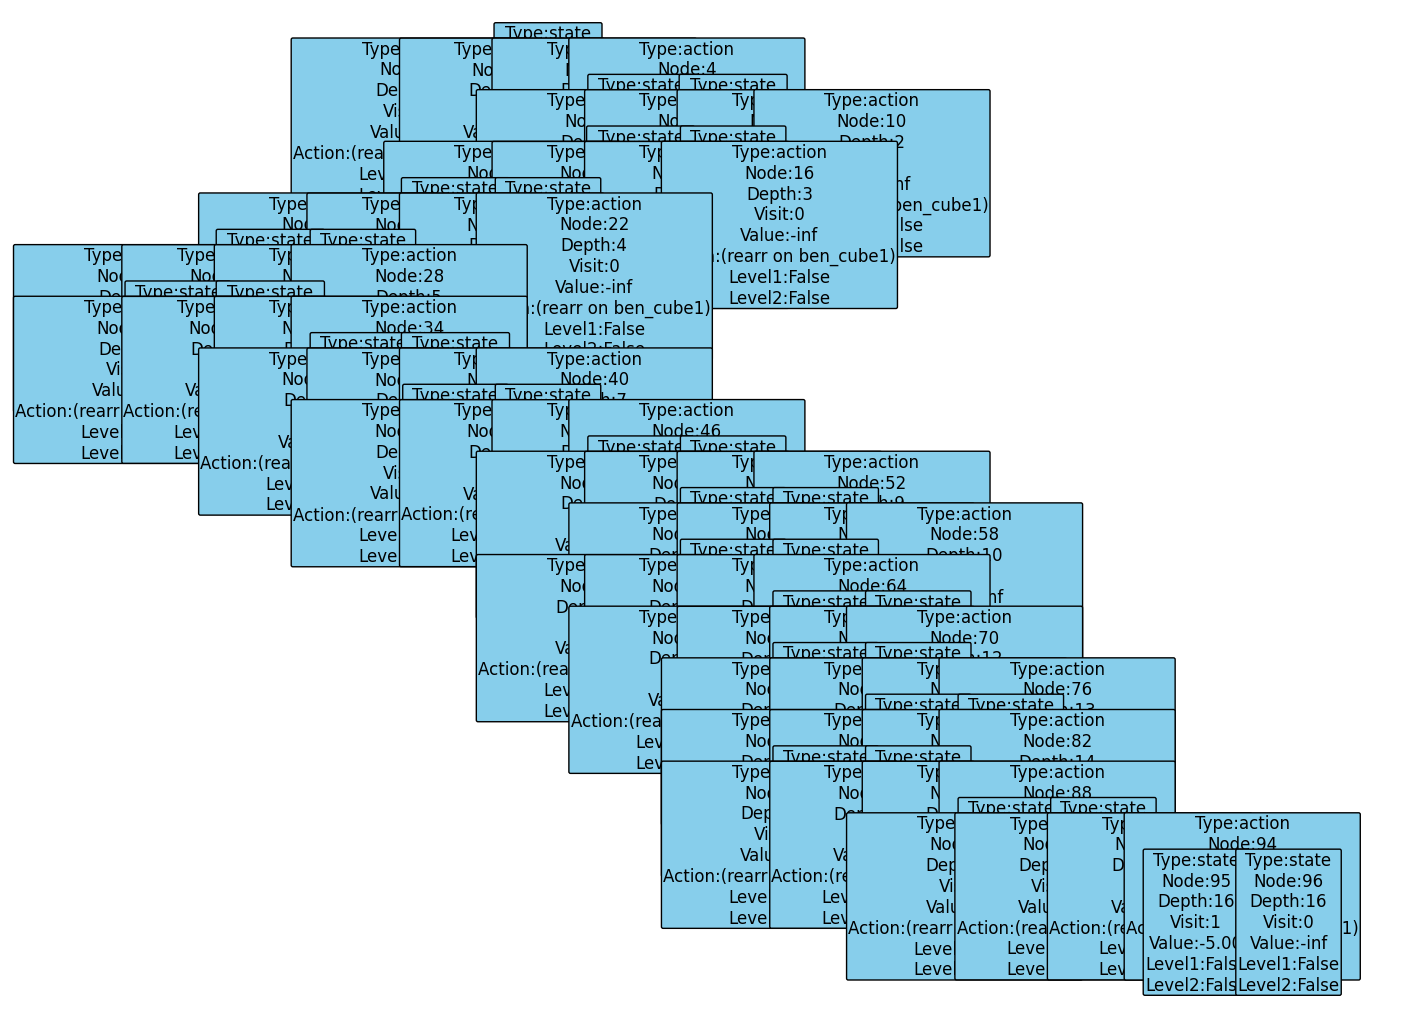

In [9]:
mcts.visualize_tree("Success nodes", mcts.tree)

In [11]:
from pykin.utils import transform_utils as t_utils

mcts.tree.nodes[1]['state'].objs['ben_cube0'].h_mat.dot\
(t_utils.get_inverse_homogeneous(mcts.scene_mngr.scene.goal_object_poses['ben_cube0']))

array([[ 0.37169005,  0.38907612,  0.84289162, -0.55528713],
       [ 0.58224141,  0.60947618, -0.53808338,  0.37844068],
       [-0.72307776,  0.69076664,  0.        ,  0.87515036],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
mcts.tree.nodes[1]['state'].objs['ben_cube0'].h_mat

array([[ 0.        , -0.53808338,  0.84289162,  0.50850984],
       [ 0.        , -0.84289162, -0.53808338,  0.46925482],
       [ 1.        ,  0.        ,  0.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [7]:
from pytamp.search.node_data import NodeData

mcts.tree.nodes.get(1).get(NodeData.ACTION)

{'ben_cube0': array([[-0.93456085,  0.35580335,  0.        ,  0.95147945],
        [-0.35580335, -0.93456085,  0.        , -0.57699393],
        [ 0.        ,  0.        ,  1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])}

In [4]:
list(mcts.rearr_action.get_possible_actions_level_1(mcts.tree.nodes[0]['state']))

[{'ben_cube0': array([[-0.90450956,  0.42645334,  0.        ,  0.39838827],
         [-0.42645334, -0.90450956,  0.        , -0.03850557],
         [ 0.        ,  0.        ,  1.        ,  0.84779998],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 {'bottle0': array([[-0.9895741 , -0.14402462,  0.        ,  0.78862205],
         [ 0.14402462, -0.9895741 ,  0.        ,  0.07789252],
         [ 0.        ,  0.        ,  1.        ,  0.87515735],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 {'bottle1': array([[-0.17594032, -0.98440084,  0.        ,  0.52446574],
         [ 0.98440084, -0.17594032,  0.        , -0.00533912],
         [ 0.        ,  0.        ,  1.        ,  0.87515735],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 {'ben_cube1': None}]

In [ ]:
mcts._level_wise_1_optimize_rearr